In [1]:
%cd ..

/Users/tamnguyen/Documents/Wudpecker-hackathon-project


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_processor import DataProcessor
from src.n_grams_scorer import NGramsScorer

In [3]:
data_path = './data/raw/'
dp = DataProcessor(data_path=data_path)
df = dp.get_data

transcripts_df = df.copy()


In [4]:
transcripts_df.reset_index(inplace=True)

In [5]:

# selecting a portion of good transcripts for training
good_transcripts = transcripts_df[transcripts_df.meaningful == 1.0]['content']
bad_transcripts  = transcripts_df[transcripts_df.meaningful == 0.0]['content']

n_good  = good_transcripts.shape[0]
n_bad   = bad_transcripts.shape[0]

n_training = n_good - n_bad
training_ind = np.random.choice(range(n_good), size=n_training, replace=False)
testing_ind = [i for i in range(n_bad + n_good) if i not in training_ind]
training_data = good_transcripts[training_ind].values
testing_data = transcripts_df.loc[testing_ind, 'content'].values
testing_labels = transcripts_df.loc[testing_ind, 'meaningful'].values

training_data[:5]

array(["(it's the dog bird) okay, so i don't know how to use the timer on my watch, so do you want me to use my watch? what do you mean you don't know how to use the timer  i don't know how to read a watch.     we're gonna get in a big brawl. ding ding one okay, or you can get somebody else's watch. yeah, somebody who knows how to use their watch. yeah i'm like i'm like making it, i ca- i can't do it. do you want yeah, somebody else use the w- here's thank you i just made it like, ten hours and three minutes. this is to reset this is start and stop wow now that's easy right here (tink tink tink.) reset start stop reset start stop   that's an Ovenbird. yeah    yeah we can we have five minutes  i'll forget in five minutes,  numbers, both we are doing both. alright you guys wanna start? yeah sure let's go for it okay. ready? you ready? oh i'm sorry that's a nuthatch. (so) that's, that's a robin? pewee Eastern Wood-Pewee. (xx) there's some kinda (xx) yeah i heard another, chickadee (xx)  n

In [6]:
scorer = NGramsScorer()
scorer.fit(training_data)
testing_scores = [scorer.score(text) for text in testing_data]

In [7]:
testing_scores

[0.08018925323248097,
 0.06206136354747075,
 0.07664921140802883,
 0.06223698633923714,
 0.058328554516623575,
 0.07120230405267984,
 0.06789749633854185,
 0.06325826033800634,
 0.06669001432995132,
 0.06738821863127586,
 0.07264466669488828,
 0.0708704157706318,
 0.06930804897124196,
 0.0924399692912876,
 0.066056738570478,
 0.05925734355172205,
 0.0610654125082577,
 0.0672831920123191,
 0.0640748712023861,
 0.07115218071487811,
 0.05718152490157847,
 0.06461791872698411,
 0.06289097768738933,
 0.07058887242573224,
 0.059504303852314686,
 0.06771938989082558,
 0.049112943635818807,
 0.021913796885707996,
 0.041246500166103386,
 0.04545892806379924,
 0.06774109522914405,
 0.05714179515214025,
 0.061178837244603025,
 0.06246356010052192,
 0.11300417246175243,
 0.012403976139080909,
 0.05508168710295619,
 0.044308208488565745,
 0.045517103875701195,
 0.04119139273355784,
 0.0037593265017967425,
 0.01011211809432521,
 0.07632679532152253,
 0.06410262524322229,
 0.04382391763778571,
 0.015

<Axes: >

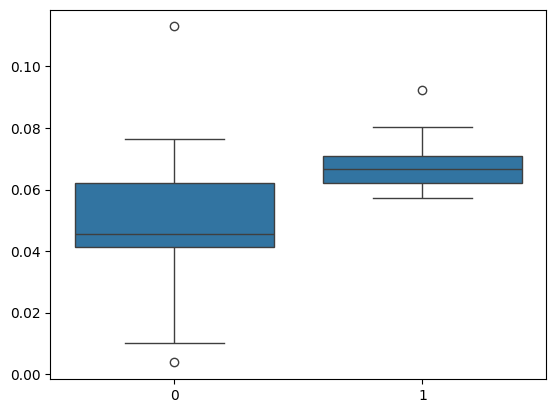

In [8]:
sns.boxplot(x=testing_labels, y=testing_scores)